NumPyの特徴は  
- 高速な行列計算と柔軟なブロードキャストを提供する効率的な多次元配列であるndarray
- 高速に動作し、呼び出しにループ記法を必要としない標準的な数学関数
- ディスクへの配列の読み書きに加え、メモリマップファイル機能を提供する入出力機能
- 行列計算、乱数生成、フーリエ変換といった機能
- C、C++、Fortranへのインタフェース

この章ではNumPyの機能として以下のことを説明する  
- ベクトル化記法による高速な計算  
- データの変更、整頓、取り出しやフィルタリング、変換といったあらゆるデータ操作
- 一般的な配列操作、ソートや重複除外操作、集合演算
- 効率的な記述統計学的データ操作、またそれに必要なデータの結合、要約
- 種類の異なるデータセットに対する統合や結合などといったデータ整理や関係データ処理
- 配列内での条件記述、ループを書くことなく、配列内で直接if-elif-else相当の制御を記述する
- グループ単位でのデータ操作(データ集計、データ構造の変更、関数の適用)

# 4.1  NumPy ndarray:多次元配列オブジェクト

ndarrayはNumPyの基本要素のひとつで、N次元配列オブジェクトに由来する  
ndarrayはPython環境における高速かつ柔軟な大規模データ処理を提供する

In [1]:
import numpy as np

In [2]:
data = np.random.randn(2, 3)
data

array([[-0.25227396,  0.61182451, -0.71354294],
       [-0.05191788,  2.5384165 ,  0.51647142]])

In [3]:
data * 10

array([[-2.5227396 ,  6.11824512, -7.1354294 ],
       [-0.51917882, 25.38416504,  5.16471421]])

In [4]:
data + data

array([[-0.50454792,  1.22364902, -1.42708588],
       [-0.10383576,  5.07683301,  1.03294284]])

作成したndarrayに算術演算を行うことで、すべての配列要素にまとめて計算することができる

In [5]:
data.shape

(2, 3)

In [6]:
data.dtype

dtype('float64')

配列の次元ごとの要素数は外側が2個、内側が3個ということがわかり、最も内側の型はfloat64ということがわかる

## 4.1.1  ndarrayの生成

ndarrayの最も簡単な生成方法はarray関数を使った方法になる  

In [7]:
data1 = [6, 7.5, 8, 0, 1]

In [8]:
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

array関数にリストを渡すことでできる

In [9]:
data2 = [[1, 2, 3, 4],[5, 6, 7, 8]]

In [10]:
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

ネストしたリストも渡すことはできるが、内側の要素数がすべて一致していなければいけない

In [11]:
arr2.ndim

2

In [12]:
arr2.shape

(2, 4)

ndim属性を呼び出すことで次元数を知ることができる  
shape属性とndim属性を使うことで内部構成を知ることができる

In [13]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
np.ones((3, 6))

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [15]:
np.empty((2 ,3 ,2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

zeros関数に要素数もしくは次元ごとの要素数のタプルを渡すことで、すべての要素に0の値を入れたndarrayを生成できる  
ones関数に要素数もしくは次元ごとの要素数のタプルを渡すことで、すべての要素に1の値を入れたndarrayを生成できる  
empty関数に要素数もしくは次元ごとの要素数のタプルを渡すことで、適当な数で生成される代わりに素早くndarrayを生成できる

In [16]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

arange関数は標準のrange関数と同じように指定することで、ndarrayを生成できる

ndarray生成関数  

|関数|説明|
|:-|:-|
|array|リスト、タプル、Python配列、その他列挙型といったデータを受けてndarrayを生成する|
|asarray|array関数と同様にndarryを生成するが、渡されたものがndarrayだった場合はコピーを作成しない|
|arange|range関数と同じ形でndarrayを生成する|
|ones, ones_like|指定されたサイズの要素を1で埋めたndaarayを生成する、ones_likeは別のシーケンス型を受けてそれを基準とした1で埋めたndarrayを生成する|
|zeros, zeros_like|指定されたサイズの要素を0で埋めたndaarayを生成する|
|empty. empty_like|指定されたサイズの要素でndarrayを生成するが、各要素は初期化されず不定のまま|
|full, full_like|指定されたサイズのndarrayを指定されたタイプで生成し、指定された値で埋める|
|eye, identity|N×Nの単位行列となるndarrayを生成する(単位行列は、対角成分の要素が1、それ以外の要素がすべて0であるような行列)|

## 4.1.2  ndarrayのデータ型

dtypeはndarrayのデータ型になる  
これはメモリ上のデータ表現形式を示す特別なオブジェクトで、データについてのデータということでメタデータの一種になる  
dtypeの役割は、あるndarrayが格納されるメモリ範囲が特定のデータ型で解釈されることを示すこと

In [17]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr1.dtype

dtype('float64')

In [18]:
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr2.dtype

dtype('int32')

外部システムとのデータ連携においてdtypeなしではできない  
多くの場合、dtypeはメモリ上にその要素の機械表現をそのまま保持する  
このためndarrayをバイトストリームとして直接読み書きしたり、ディスクに直接入出力したり、さらにはCやFortranといった機械言語に近い言語で書かれたアプリケーションと連携したり、といったことができる  
数値型のdtypeには命名規則があり、float、intといった型名の後ろにビット長を示す数字が付く  
たとえば倍精度浮動小数点を考えると、8バイト、すなわち64ビットで表現されるものであり、NumPyのdtypeはfloat64という型名になる  
以下がNumPyのサポートするデータ型の表になる  

|型|型コード|説明|
|:-|:-|:-|
|int8, uint8|i1, u1|符号あり/なし8ビット整数型(1バイト)|
|int16, uint16|i2, u2|符号あり/なし16ビット整数値|
|int32, uint32|i4, u4|符号あり/符号なし32ビット整数値|
|int64, uint64|i8, u8|符号あり/符号なし64ビット整数値|
|float16|f2|半精度浮動小数点型|
|float32|f4(もしくはf)|単精度浮動小数点型|
|float64|f8(もしくはd)|倍精度浮動小数点型|
|float128|f16(もしくはg)|四倍精度浮動小数点型|
|complex64, complex128, complex256|c8, c16, c32|複素数型。2つの浮動小数点数の組で表される。complex(64,128,256)は実部・虚部ともに(32,64,128)ビット単精度型|
|bool|?|真偽値型(TrueあるいはFalse)|
|object|0|Pythonオブジェクト型|
|string_|S|固定長文字列型。1文字当たり1バイト。10文字の文字列型dtypeはS10となる|
|unicode_|U|固定長ユニコード文字列型。1文字当たりのバイト数はプラットフォーム依存|

dtypeを明示的に型変換(キャスト)するにはNumPyのastypeメソッドを使う  
astypeは元となるndarrayをキャストし、コピーした新しいndarrayを戻す

In [19]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int32')

In [20]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [21]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [22]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

上のように整数型を小数点型にキャストしたり、小数型を整数型にキャストすることができる  
ただし、小数型を整数型にキャストする場合は小数部は切り捨てられる

In [23]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)
numeric_strings

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

In [24]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

数値が文字列型として格納されている場合は、astypeを用いて数値型にキャストすることができる

例えば数字でない文字列をfloat64にキャストしようとした場合など、なんらかの理由でキャストが失敗した場合はValueErrorが発生する  
またnp.float64ではなくfloatと書くこともでき、その場合はNumPyは標準Python型をそれと等価なdtypeに自動変換してくれる

In [25]:
int_arr = np.arange(10)

In [26]:
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

In [27]:
int_arr.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

キャストを行う別の方法として、ndarrayオブジェクトのdtypeアトリビュートを渡すことでもできる

In [28]:
empty_uint32 = np.empty(8, dtype="u4")
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

dtypeに型名を渡す以外にも、型コードを渡すことでもできる

## 4.1.3  ndarrayの算術演算

ndarrayでは、要素ごとの処理のためにわざわざループを書く必要がない  
この機能はベクトル演算と呼ばれ、NumPyの重要な特徴のひとつになる  

In [29]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [30]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [31]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

同じサイズのndarray同士の算術演算は、同位置の要素同士で計算される

In [32]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [33]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

スカラーとndarrayとの算術演算は、要素ごとに計算される

In [34]:
arr2 = np.array([[0., 4., 1.,], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [35]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

ndarray間を比較したとき、その結果はどう要素数のbool値で戻される

サイズの異なるndarray同士の演算はブロードキャストと呼ばれる

## 4.1.4  インデックス参照とスライシングの基礎

インデックス参照はデータから一部を切り出す、あるいは個々の要素を取り出すことができる機能になる  
インデックス参照には様々な方法が存在する

In [36]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
arr[5]

5

In [38]:
arr[5:8]

array([5, 6, 7])

In [39]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

1次元のndarrayの場合、リストfと同じようにスライスを使って取り出すことができる  
また、指定した範囲に代入を行うことで要素の変更もできる  

In [40]:
arr_slice =arr[5:8]
arr_slice

array([12, 12, 12])

In [41]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [42]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

Pythonのリストとの違いは、スライスした結果が元のndarrayのビュー(参照)であり、元のndarrayのコピーではないというところにある  
そのため、スライスに対して変更を行うと元のndarrayも反映される

In [43]:
arr_copy = arr[5:8].copy()
arr_copy

array([64, 64, 64])

In [44]:
arr_copy[:] = 10
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

スライスをニューではなくコピーしたい場合は、ndarrayのコピーメソッドを呼び出して別の変数に代入することで明示的にコピーをする必要がある

In [45]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [46]:
arr2d[2]

array([7, 8, 9])

In [47]:
arr2d[0][2]

3

In [48]:
arr2d[0, 2]

3

多次元のndarrayの場合は、リストのようにインデックス値を指定してもスカラー値ではなく配列が取得される  
そのため手に入れたいスカラー値か配列にたどり着くまでインデックス指定を繰り返す必要がある  
[N][N]のように指定してもよいし、簡単に書きたいなら[N, N]とまとめて書くこともできる

### 4.1.4.1  スライスによるインデックス参照

ndarrayはスライス記法で部分的に切り出すことができる

In [49]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [50]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [51]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [52]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

リストと同じようにすれば1次元のndarrayだと参照することができる

In [53]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

多次元の場合は上で行ったインデックス指定のように[1番目の次元の範囲指定, 2番目の次元の範囲指定,...]とすることで細かく範囲指定を行うことができる  
このように範囲指定でスライス行う場合、得られるのは元の次元と同次元のビューになる

In [54]:
arr2d[1, :2] # 1次元にする

array([4, 5])

一方で、スライスだけでなくインデックス指定を交えて範囲を指定した場合は元の次元数よりも次元が減ったものになる  
上では2つめの配列を指定したうえで、範囲指定を行っている

In [55]:
arr2d[1:2, :2] # 2次元を維持

array([[4, 5]])

つまり次元数を変更ししたくない場合は、インデックス指定を使わずにスライスを使って範囲を指定すればよい

In [56]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

スライスしたndarrayへスカラー値の代入を行うと、その範囲の要素すべてを変更する(インデックス指定のときと同じ)

## 4.1.5  ブルーインデックス参照

In [57]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [58]:
data = np.random.randn(7, 4)
data

array([[ 0.45317028,  1.05357944,  0.73467967, -0.78044309],
       [ 0.30083998,  1.86274804,  0.95165147, -1.39499328],
       [-0.33316529, -1.03097943,  1.27748006, -0.51466567],
       [-0.82153369,  1.50253666,  0.35659241, -0.91788374],
       [-0.33523773, -0.39816531,  0.43901122,  1.47092568],
       [-0.21822879,  0.21207756,  1.73738333,  2.31897921],
       [-1.03872833, -0.16408179, -0.39457264, -1.00006852]])

namesは一次元の配列で重複した要素のあるndarrayで、dataは7×4の二次元のランダムな数字のndarrayになる  
namesの内容がdataのそれぞれの行に対応しているものとする

In [59]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

上のようにndarrayに比較演算を行うことで、ブール値のndarrayを得ることができる  
これを利用して参照するのがブールインデックス参照というものになる

In [60]:
data[names == "Bob"]

array([[ 0.45317028,  1.05357944,  0.73467967, -0.78044309],
       [-0.82153369,  1.50253666,  0.35659241, -0.91788374]])

上のように比較演算式を用いてインデックス指定を行うことができる  
ただし、参照先配列の軸の要素数と真偽値配列の要素数が一致している必要がある

In [61]:
data[names == "Bob", 2:]

array([[ 0.73467967, -0.78044309],
       [ 0.35659241, -0.91788374]])

In [62]:
data[names == "Bob", 3]

array([-0.78044309, -0.91788374])

ブールインデックス指定とスライスの範囲指定やインデックス指定を組み合わせることも可能

In [63]:
data[names != "Bob"]

array([[ 0.30083998,  1.86274804,  0.95165147, -1.39499328],
       [-0.33316529, -1.03097943,  1.27748006, -0.51466567],
       [-0.33523773, -0.39816531,  0.43901122,  1.47092568],
       [-0.21822879,  0.21207756,  1.73738333,  2.31897921],
       [-1.03872833, -0.16408179, -0.39457264, -1.00006852]])

In [64]:
data[~(names == "Bob")]

array([[ 0.30083998,  1.86274804,  0.95165147, -1.39499328],
       [-0.33316529, -1.03097943,  1.27748006, -0.51466567],
       [-0.33523773, -0.39816531,  0.43901122,  1.47092568],
       [-0.21822879,  0.21207756,  1.73738333,  2.31897921],
       [-1.03872833, -0.16408179, -0.39457264, -1.00006852]])

比較演算子として!=を使ってもよいし、真偽を逆転させる~を使ってのブールインデックス指定もできる

In [65]:
mask = (names == "Bob") | (names == "Will")
mask

array([ True, False,  True,  True,  True, False, False])

In [66]:
data[~mask]

array([[ 0.30083998,  1.86274804,  0.95165147, -1.39499328],
       [-0.21822879,  0.21207756,  1.73738333,  2.31897921],
       [-1.03872833, -0.16408179, -0.39457264, -1.00006852]])

In [67]:
data[(names == "Bob") | (names == "Will")]

array([[ 0.45317028,  1.05357944,  0.73467967, -0.78044309],
       [-0.33316529, -1.03097943,  1.27748006, -0.51466567],
       [-0.82153369,  1.50253666,  0.35659241, -0.91788374],
       [-0.33523773, -0.39816531,  0.43901122,  1.47092568]])

2つ以上の条件を組み合わせることもでき、論理演算子の&(and)や|(or)を使うことでできる

ブールインデックス参照で摘出されたデータは、元データのコピーになる

In [68]:
data[data < 0] = 0
data

array([[0.45317028, 1.05357944, 0.73467967, 0.        ],
       [0.30083998, 1.86274804, 0.95165147, 0.        ],
       [0.        , 0.        , 1.27748006, 0.        ],
       [0.        , 1.50253666, 0.35659241, 0.        ],
       [0.        , 0.        , 0.43901122, 1.47092568],
       [0.        , 0.21207756, 1.73738333, 2.31897921],
       [0.        , 0.        , 0.        , 0.        ]])

In [69]:
data[names != "Joe"] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.30083998, 1.86274804, 0.95165147, 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.21207756, 1.73738333, 2.31897921],
       [0.        , 0.        , 0.        , 0.        ]])

ブールインデックス参照を使って、条件を満たした要素のみに値を代入することができる

## 4.1.6  ファンシーインデックス参照

ファンシーインデックス参照とは、インデックス参照に整数配列を用いる方法になる

In [70]:
arr = np.empty((8,4))
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [71]:
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [72]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

ndarrayに整数のリスト、もしくはndarrayをインデックス参照として渡すことで、特定の順序で行を抽出することができる

In [73]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

負数でも同じように順番通りに指定することができる

In [74]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [75]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

二次元配列に対して複数のインデックス配列を指定すると、結果は一次元配列として返ってきてしまう  
上の場合だと(1,0),(5,3),(7,1),(2,2)の位置の要素が選択されたことになる  

In [76]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

2次元配列のまま、ndarrayの列と行を入れ替えた配列を摘出したい場合は上のようにすることでできる  
最初のファンシーインデックス参照で行を選択して並び替え  
次のファンシーインデックス参照で最初の次元はすべて選択し、列を0,3,1,2の順番で並び替えている

## 4.1.7  転置行列、行と列の入れ替え

ndarrayの転置はオリジナルの行列を再構成した特別なビューを返す  
行列を転置するにはtranspose関数を適用する方法と、ndarrayの属性のひとつであるTを参照する方法がある

In [77]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [78]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

上が属性のTを参照する方法

In [79]:
arr = np.random.randn(6, 3)
arr

array([[ 0.4557103 ,  0.45818131,  0.41159704],
       [ 1.30221101,  0.65412761, -1.09263046],
       [ 0.80589831,  0.65915079,  0.40847844],
       [-0.14459369,  0.22771958, -1.5518365 ],
       [ 0.34921258, -0.87034721, -1.16525052],
       [-0.40136817, -0.89270954, -1.19591621]])

In [80]:
np.dot(arr.T, arr)

array([[ 2.85685063,  1.6132608 , -0.608606  ],
       [ 1.6132608 ,  2.67858361,  1.47151   ],
       [-0.608606  ,  1.47151   ,  6.72632896]])

上のように、NumPyのdot関数で内積を行うようなときに頻繁に転置行列を用いる

In [81]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [82]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

高次元配列の場合、transposeメソッドの引数に軸の順序を与えることでその順番に入れ替えることができる(0から順番に指定)  
上の場合2つめの次元の要素を各先頭に持ってきて、2番目に最初の次元、3番目に最後の次元を持ってきている

In [83]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [84]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [85]:
arr.transpose(0, 2, 1)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

ndarrayのT属性で得られる転置行列は軸入れ替えの特別ケースで、swapaxesはこれを一般化し、任意の軸順序を転置できる  
上の場合だと2番目の次元と3番目の次元を入れ替えて(2, 4, 2)の並びにしている

# 4.2  ユニバーサル関数:すべての配列要素への関数適用

ユニバーサル関数(ufunc)はndarrayを対象に、要素ごとの操作結果を戻す関数になる  
これはスカラーを引数に指定してスカラーを戻すような関数をベクトル対応し、ndarrayを引数に指定してndarrayを高速に戻すように拡張したものととらえることができる  
多くのufuncは要素ごとの基本的な計算処理を提供する  

In [86]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [87]:
np.sqrt(arr) # 平方根

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [88]:
np.exp(arr) # 自然対数(約2.7)のarrの要素乗

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

上のsqrt関数とexp関数は1つのndarrayを取り、計算したndarrayを返すことから単項ufuncと呼ばれる

In [89]:
x = np.random.randn(8)
x

array([ 0.00389774, -0.03895527, -1.25227413,  0.62732892,  0.35074943,
       -0.0309229 ,  0.72567936, -0.46674374])

In [90]:
y = np.random.randn(8)
y

array([-0.58175545,  0.51964868,  1.68243117, -0.8681078 , -0.07053965,
        1.04356024, -1.7251986 , -0.60298224])

In [91]:
np.maximum(x, y)

array([ 0.00389774,  0.51964868,  1.68243117,  0.62732892,  0.35074943,
        1.04356024,  0.72567936, -0.46674374])

In [92]:
np.add(x, y)

array([-0.57785771,  0.48069341,  0.43015704, -0.24077887,  0.28020978,
        1.01263734, -0.99951924, -1.06972599])

上のようなmaximum関数やadd関数などは2つのndarrayを取り、計算した1つのmdarrayを返すことから二項ufuncと呼ばれる

In [93]:
arr = np.random.randn(7) * 5
arr

array([ 1.06413073,  0.22927286, -1.96290007,  2.98757015,  9.51964021,
        2.33037435, -1.13269437])

In [94]:
remainder, whole_part = np.modf(arr) # 整数部分と小数点部分に分ける

In [95]:
remainder

array([ 0.06413073,  0.22927286, -0.96290007,  0.98757015,  0.51964021,
        0.33037435, -0.13269437])

In [96]:
whole_part

array([ 1.,  0., -1.,  2.,  9.,  2., -1.])

珍しいufuncとして複数のndarrayを返すものがある  
modf関数はそのうちのひとつで、組み込み関数のdivmodと同じ処理を全ての要素に適用する  

In [97]:
arr

array([ 1.06413073,  0.22927286, -1.96290007,  2.98757015,  9.51964021,
        2.33037435, -1.13269437])

In [98]:
np.sqrt(arr, out=arr)

C:\Users\kumak\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([1.03156713, 0.47882446,        nan, 1.72845889, 3.08539142,
       1.52655637,        nan])

In [99]:
arr

array([1.03156713, 0.47882446,        nan, 1.72845889, 3.08539142,
       1.52655637,        nan])

ufuncにはout引数を渡すことができ、これにndarrayを渡すことでビューではなく直接変更できる

ufuncの一覧

単項ufunc

|関数|説明|
|:-|:-|
|abs, fabs|各要素の整数、小数、複素数の絶対値を計算する。fabsはabsの高速版で、対象を整数と小数に限定する|
|sqrt|各要素の平方根を計算する(\*\*0.5)|
|square|各要素の2乗を計算する(\*\*2)|
|exp|各要素を指数として自然対数の底e(約2.7)のべき乗(eのx乗)を計算する|各要素を指数として自然対数の底e(約2.7)のべき乗(eのx乗)を計算する|
|log, log10, log2, log1p|各要素を真数とし、logは底eの自然対数を、log10は底10の常用対数を、log2は底2の対数を計算する。log1pは各要素に1を加えた数を真数として底eの自然対数を計算する|
|sign|各要素の符号を返す。正は1、ゼロは0、負は-1になる|
|ceil|各要素の切り上げを計算する|
|floor|各要素の切り捨てを計算する|
|rint|各要素の四捨五入を計算する|
|modf|要素ごとに整数部分と小数部分に分割して、それぞれの配列を返す|
|isnan|要素ごとにNaNかどうかを判定した結果を返す|
|isfinite, isinf|isfiniteは要素ごとに有限(infでもNaNない)かどうか、isinfは要素ごとに無限(inf)かどうかを判定した結果を返す|
|cos, cosh, sin, sinh, tan, tanh|各要素の余弦、双曲線余弦、正弦、双曲線正弦、正接、双曲線正接を計算する|
|arccos, arccosh, arcsin, arcsinh, arctan, arctanh|各要素の逆余弦、逆双曲線余弦、逆正弦、逆双曲線正弦、逆正接、逆双曲線正接を計算する|
|logical_not|各要素の論理否定を返す(~arrと同じ)|

二項ufunc

|関数|説明|
|:-|:-|
|add|配列の要素ごとの和を取る|
|subtract|1番目の配列から2番目の配列のそれぞれの要素の差を取る|
|multiply|配列の要素ごとの積を取る|
|divide, floor_divide|divideは配列の要素ごとの商を取る。floor_divideは商を取り、余りを切り捨てる|
|power|1番目の配列要素を底とし、2番目の配列要素でべき乗する|
|maximum, fmax|配列の要素ごとの最大値を計算する。要素がNaNの場合、maximumはNaNを返し、fmaxはNaNではない要素を返す|
|minimum, fmin|配列の要素ごとの最小値を計算する。要素がNaNの場合、minimumはNaNを返し、fminはNaNではない要素を返す|
|mod|配列の要素ごとの剰余を計算する|
|copysign|1番目の配列要素の値に2番目の配列要素の符号をつける|
|greater, greater_equal, less, less_equal, equal, not_equal|配列の要素ごとの比較結果を真偽値で格納した配列を返す。次の中置二項演算子と同じ>,>=,<,<=,==,!=|
|logical_and, logical_or, logical_xor|配列の要素ごとに論理演算する。次の中置二項演算子と同じ&,|,^|

# 4.3  ndarrayによる配列指向プログラミング

ndarrayを用いると、多様なデータ処理タスクを簡潔な配列表現で記述できる  
このためループ処理を書く必要がなく、この配列表現のことをベクトル演算と呼ぶ  
ベクトル演算はPython標準環境と比較して大変高速であり、あらゆる数値計算処理に有利になる  

与えられた格子点状のデータに対して、関数sqrt(x^2 + y^2)を評価することを例として考えてみる  

In [100]:
points = np.arange(-5, 5, 0.01) # 等間隔に配置された1,000個の格子点

In [101]:
xs, ys = np.meshgrid(points, points)

In [102]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [103]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [104]:
ys.shape

(1000, 1000)

格子点データを用意するのにnp.meshgridを用いている  
meshgrid関数は2つの1次元配列を取り、それぞれの要素のすべての組み合わせを列挙する

In [105]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

2つの格子点データを組み合わせて(xs ** 2 + ys ** 2)の値の平方根(sqrt)を要素ごとに計算していく  

In [106]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

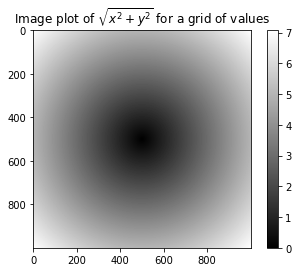

In [107]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

Matplotlibのimshow関数を用いて2次元配列を可視化してみると上のようになる

## 4.3.1  条件制御のndarrayでの表現

In [108]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

上のような3つの1次元配列があったとする  
この時に、condの要素がTrueであればxarrの要素を取り、Falseであればyarrの要素を取るようにしたい

In [109]:
result = [(x * 3 if c else y * 3) for x, y, c in zip(xarr, yarr, cond)] # 計算がうまくいかないことを示すためにあえて3をかけてみた

In [110]:
result

[3.3000000000000003,
 6.6000000000000005,
 3.9000000000000004,
 4.199999999999999,
 7.5]

上のようにPython標準機能のリスト内包表記を使って書き下ろすことはできるが、いろいろと問題が起きてしまう  
まずPython標準の機能だと対象の配列が多くなると処理に時間がかかってしまうこと  
次に多次元配列に対応することができないことが挙げられる

In [111]:
result = np.where(cond, xarr, yarr) * 3
result

array([3.3, 6.6, 3.9, 4.2, 7.5])

NumPyのwhere関数を使うことで先程の問題を解消できるうえに簡単に条件制御を行える  
使い方としては、where関数の第一引数に条件の評価配列、第二引数にTrueの場合に使用する配列、第三引数にFalseの場合に使用する配列を渡すだけになる  

In [112]:
arr = np.random.randn(4, 4)
arr

array([[-1.32043687e+00, -2.53205731e-04,  9.67248004e-01,
        -1.02975060e+00],
       [-2.41410708e-01, -2.01413543e+00,  1.64451975e-01,
         4.48363722e-01],
       [-1.09089272e+00, -3.14431319e-01,  7.16844252e-01,
         1.24248449e+00],
       [ 1.34187103e+00,  4.06986705e-01, -5.63032549e-03,
         2.93519657e-01]])

In [113]:
arr > 0

array([[False, False,  True, False],
       [False, False,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False,  True]])

In [114]:
np.where(arr > 0, 2, -2)

array([[-2, -2,  2, -2],
       [-2, -2,  2,  2],
       [-2, -2,  2,  2],
       [ 2,  2, -2,  2]])

where関数の第二と第三引数には配列ではなくスカラー値を渡すこともできる  
上の場合だと正の数か負の数かで評価配列を作り、正であれば2、負であれば-2とする配列を作成している  

In [115]:
np.where(arr > 0, 2, arr)

array([[-1.32043687e+00, -2.53205731e-04,  2.00000000e+00,
        -1.02975060e+00],
       [-2.41410708e-01, -2.01413543e+00,  2.00000000e+00,
         2.00000000e+00],
       [-1.09089272e+00, -3.14431319e-01,  2.00000000e+00,
         2.00000000e+00],
       [ 2.00000000e+00,  2.00000000e+00, -5.63032549e-03,
         2.00000000e+00]])

上のようにwhere関数を呼び出すときにスカラー値とndarrayを組み合わせることもできる

## 4.3.2  数学関数、統計関数

NumPyの統計関数は、ndarray配列全体、あるいは特定の軸を中心とした統計処理を行うことができる  
sumやmeanといった集計処理(次元削減とも呼ばれる)や標準偏差を求めるstdなどを、ndarrayのメソッドとして呼び出したり、NumPyの関数として呼び出したりして使用することができる

In [116]:
arr = np.random.randn(5, 4)
arr

array([[-0.92406253,  0.78559207, -0.05113447,  0.14765161],
       [ 1.53457374,  0.03975111,  0.78162185,  0.00380799],
       [-0.73981834,  1.49455774,  0.47051625, -1.02592673],
       [-0.24885014,  0.86146064, -1.94184839, -0.85583253],
       [-1.21356741,  0.18912428,  0.04549764,  0.32864709]])

In [117]:
arr.mean()

-0.01591192778571999

In [118]:
np.mean(arr)

-0.01591192778571999

上では正規分布からランダムデータを生成し、ndarrayのメソッドを利用した方法と、NumPyの関数を利用した方法の2種類で平均を求めている

In [119]:
arr.mean(axis=1)

array([-0.01048833,  0.58993867,  0.04983223, -0.54626761, -0.1625746 ])

In [120]:
arr.sum(axis=0)

array([-1.59172469,  3.37048584, -0.69534713, -1.40165258])

meanやsumなどは、どの軸を対象にして計算するかをキーワード引数のaxisを使用して指定することができる  
渡した引数が0なら列ごとに計算し、渡した引数が1なら行ごとに計算してくれる  

In [121]:
arr = np.arange(1, 9)
arr

array([1, 2, 3, 4, 5, 6, 7, 8])

In [122]:
arr.cumsum()

array([ 1,  3,  6, 10, 15, 21, 28, 36], dtype=int32)

In [123]:
arr.cumprod()

array([    1,     2,     6,    24,   120,   720,  5040, 40320],
      dtype=int32)

集計処理以外にも、sumsum(累積和)やcumprod(累積積)といった関数もあり、集計結果のみを返すのではなく和や積の計算の途中経過を含めて返してくれる

In [124]:
arr = np.arange(9).reshape(3, 3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [125]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36], dtype=int32)

In [126]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [127]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

多次元配列の場合、累積関数はそのままだと全ての要素をまとめて計算し1次元にして返す  
しかしaxisで処理を行う行か列を指定することで、軸に沿って計算を行ってくれる

基本的なndarrayの統計関数

|関数|定義|
|:-|:-|
|sum|配列の和を指定された軸に沿って計算する。0の配列に対しては0を返す|
|mean|配列の平均を計算する。0の配列にはNaNを返す|
|std, var|標準偏差、分散。自由度のデフォルトはnで、任意の値を指定できる|
|argmin, argmax|最小値を持つ要素のインデックス、最大値を持つ要素のインデックス|
|cumsum, cumprod|累積和、累積積|

## 4.3.3  真偽値配列関数

In [128]:
arr = np.random.randn(100)

In [129]:
arr > 0

array([False, False,  True,  True, False, False,  True,  True,  True,
        True, False,  True, False, False, False,  True, False, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False,  True,  True, False, False, False,  True,
        True, False, False,  True, False,  True, False,  True,  True,
        True])

In [130]:
(arr > 0).sum()

55

真偽値に関数を適用する場合、Trueは1、Falseは0として扱われる  
そのため、sumを用いて真偽値配列の中のTrueの数を数えることができる

In [131]:
bools = np.array([False, False, True, False])

In [132]:
bools.any()

True

In [133]:
bools.all()

False

ndarrayにはanyとallという2つのメソッド(もしくはNumPyの関数)があり、真偽値配列に適用する場合に便利なものになる  
anyは要素に1つでもTrueがあればTrueを返し、allは要素のすべてがTrueの場合にTrueを返す  
anyとallは真偽値以外の配列にも適用でき、その場合は0以外の値がTrueとしてみなされる

## 4.3.4  ソート

In [134]:
arr = np.random.randn(6)
arr

array([-0.26408145,  0.43976413,  0.85698501,  0.84835738,  0.12577977,
       -0.12176059])

In [135]:
arr.sort()
arr

array([-0.26408145, -0.12176059,  0.12577977,  0.43976413,  0.84835738,
        0.85698501])

Pythonのリスト同様に、NumPyのndarrayもsortメソッドで並び替えることができ、ndarrayを直接置換できる

In [136]:
arr = np.random.randn(5, 3)
arr

array([[ 1.3800412 , -0.36983691, -0.62361248],
       [-0.02973085, -1.00961579, -0.0664629 ],
       [-1.05126118,  0.17501369,  0.45118593],
       [-0.320785  ,  0.17978911,  0.26311542],
       [ 1.41609841, -0.4402983 , -1.38706007]])

In [137]:
arr.sort(1)
arr

array([[-0.62361248, -0.36983691,  1.3800412 ],
       [-1.00961579, -0.0664629 , -0.02973085],
       [-1.05126118,  0.17501369,  0.45118593],
       [-0.320785  ,  0.17978911,  0.26311542],
       [-1.38706007, -0.4402983 ,  1.41609841]])

多次元配列をソートする場合、任意の軸に沿ってソートをすることができる  
sortメソッドにソートする軸を指定する整数を渡すことでできる

In [138]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% 分位点

-1.6700391146381555

In [139]:
np.sort(large_arr)

array([-2.96970866e+00, -2.84590528e+00, -2.74585404e+00, -2.70673260e+00,
       -2.59544792e+00, -2.49441161e+00, -2.46176429e+00, -2.45921652e+00,
       -2.45388701e+00, -2.38655686e+00, -2.36804731e+00, -2.29291753e+00,
       -2.27523138e+00, -2.26405426e+00, -2.20103200e+00, -2.17562188e+00,
       -2.16788006e+00, -2.16356183e+00, -2.12211207e+00, -2.10685408e+00,
       -2.08660540e+00, -2.08020280e+00, -2.04365356e+00, -2.03567602e+00,
       -2.00537440e+00, -1.97282524e+00, -1.93081990e+00, -1.90239412e+00,
       -1.89743699e+00, -1.88122646e+00, -1.87814000e+00, -1.87210062e+00,
       -1.81516157e+00, -1.80497246e+00, -1.80140353e+00, -1.79605265e+00,
       -1.78887158e+00, -1.77449125e+00, -1.77442623e+00, -1.76322458e+00,
       -1.75293814e+00, -1.75200066e+00, -1.74889582e+00, -1.74713294e+00,
       -1.71885944e+00, -1.70059664e+00, -1.69821808e+00, -1.69206501e+00,
       -1.68704219e+00, -1.67850532e+00, -1.67003911e+00, -1.66175562e+00,
       -1.65854999e+00, -

ndarrayのメソッドとしてのsortとNymPyの関数としてのsortがあり、メソッドのsortは直接置換し、関数のsortはコピーを返す  
上のlarge_arrは5パーセンタイル分位点を求めるためのものになる

## 4.3.5  集合関数:uniqueなど

NumPyには1次元のndarrayを対象とした基本的な集合関数が提供されている

In [140]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [141]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

NumPyのunique関数は、渡した配列から重複した要素を取り除き、ソートした結果を返す

In [142]:
values = np.array([6, 0, 0, 3, 2 ,5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

NumPyのin1d関数は、配列内に指定した要素群が存在するかを判別し、ブール値の配列にして返してくれる

NumPyの集合関数

|関数|説明|
|:-|:-|
|unique(x)|配列xに対し、重複を除外してソートする|
|intersect1d(x, y)|配列xとyのうち、共通する要素を取り出しソートする(積集合)|
|union1d(x, y)|配列xとyのうち、すくなくとも一方にぞんざいする要素を取り出しソートする(和集合)|
|in1d(x, y)|配列xの各要素に対し、配列yの要素群が含まれているかを判定し、その結果を真偽値配列として返す|
|setdiff1d(x, y)|配列xから、配列yに存在する要素を取り除きソートする(差集合)|
|setxor1d(x, y)|配列xとyのうち、どちらか一方にのみ存在する要素を取り出しソートする(排他的論理和)|

# 4.4  ndarrayのファイル入出力

NumPyはデータの入出力をサポートしており、形式にバイナリとテキストを選ぶことができる  
ただし、テキストファイルやテーブル形式データを読み込むのにpandasを用いることが多いため、バイナリフォーマットにフォーカスしていく  

In [143]:
arr = np.arange(10)
np.save(r".\pydata\some_array", arr)

NumPyのsave関数にファイル名とndarrayを渡すことで、ディスクへの保存ができる  
デフォルトではndarrayデータは無圧縮のバイナリで保管され、拡張子は.npyになる

In [144]:
np.load(r".\pydata\some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

NumPyのload関数にファイル名を渡すことで.npyファイルのndarrayをディスクから読み込むことができる

In [145]:
arr1 = np.arange(0, 5)
arr2 = np.arange(5,10)

In [146]:
np.savez(r".\pydata\array_archive.npz", a=arr1, b=arr2)

NumPyのsavez関数を使うことで複数のndarrayを無圧縮アーカイブとして拡張子を.npzで保存することができる  
個々のndarrayを区別するために、キーワードを指定するためにキーワード引数としてndarrayを保存する

In [147]:
arch = np.load(r".\pydata\array_archive.npz")

In [148]:
arch["a"]

array([0, 1, 2, 3, 4])

In [149]:
arch["b"]

array([5, 6, 7, 8, 9])

.npzファイルを読み込んでndarrayを取り出すには、NumPyのload関数でndarrayのオブジェクトを作成し、辞書のようにキーワードを指定して呼び出す  
load関数で読み込んだ時点は遅延読み込みで、キーワードを指定された時点で初めてロードされる

In [150]:
np.savez_compressed(r".\pydata\arrays_compressed.npz", a=arr1, b=arr2)

NumPyのsavez_compressed関数を使うことでデータを圧縮して保存することができる

# 4.5  行列計算

行列の計算(線形代数)には行列の積、行列の分解、行列式の計算、正方行列にまつわる各種の計算などがあり、これらはNumPyを含むあらゆる配列計算ライブラリにとって重要な機能の一部になる  
MATLABなどのほかの言語と比較して、NumPyでは演算子\*の定義が異なる  
MATLABでは\*を2次元配列同士の内積(ドット積)として使うが、NumPyでは対応する要素ごとを掛け合わせることを意味する  
そのためNumPyでは内積を計算するためのdot関数(もしくはdotメソッド)が提供されている

In [151]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [152]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [153]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [154]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

上の内積の計算は`1*6 + 2*-2 + 3*8 = 28 , 1*23 + 2*7 + 3*9 = 64 , 4*6 + 5*-1 + 6*8 = 67 , 4*23 + 5*7 + 6*9 = 181`という感じで求められている  

In [155]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

上のように関数で求めることもでき、x.dot(y)と同じ結果になる

In [156]:
np.dot(x, np.ones(3))

array([ 6., 15.])

2次元配列と、それに対応する要素数を持つ1次元配列の内積を求めると、1次元配列になる

In [157]:
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

行列の内積を求める二項演算子として@を使うこともできる

標準的な行列の分解、逆、行列式の計算といった機能はNumPyのlinalgモジュールで提供されている

In [158]:
from numpy.linalg import inv, qr

In [159]:
X = np.random.randn(5, 5)

In [160]:
mat = X.T.dot(X)

In [161]:
mat

array([[ 8.18141116, -4.16621259, -2.71770301, -1.39797575, -0.94274733],
       [-4.16621259,  5.74622725, -0.67343092,  2.40600728,  1.5812206 ],
       [-2.71770301, -0.67343092,  3.69968407,  0.57452678, -0.38743273],
       [-1.39797575,  2.40600728,  0.57452678, 14.06082212,  1.48337181],
       [-0.94274733,  1.5812206 , -0.38743273,  1.48337181,  1.09687404]])

In [162]:
inv(mat)

array([[ 0.44986977,  0.38105716,  0.41021154, -0.04124807,  0.03801138],
       [ 0.38105716,  0.61218557,  0.35910831, -0.04242489, -0.37077878],
       [ 0.41021154,  0.35910831,  0.66330647, -0.06422855,  0.15604147],
       [-0.04124807, -0.04242489, -0.06422855,  0.08932835, -0.11778454],
       [ 0.03801138, -0.37077878,  0.15604147, -0.11778454,  1.69325916]])

In [163]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -1.56608514e-16, -5.64557862e-17,
         4.36832586e-18, -8.18610178e-17],
       [-3.54038319e-16,  1.00000000e+00, -1.06383079e-16,
         4.58022733e-18,  1.12723042e-16],
       [-3.43080602e-17, -1.07128968e-16,  1.00000000e+00,
         1.08927664e-17,  4.40656518e-17],
       [-2.08809270e-16, -2.73831266e-16, -2.27436375e-16,
         1.00000000e+00, -1.75656704e-16],
       [-1.30690163e-16, -8.55499912e-17, -8.58317812e-17,
         2.21708310e-17,  1.00000000e+00]])

In [164]:
q, r = qr(mat)

In [165]:
r

array([[-9.72223401,  6.27937452,  3.07764195,  4.53371915,  1.68228521],
       [ 0.        , -4.4371781 ,  3.06379582, -6.07816096, -1.80618222],
       [ 0.        ,  0.        , -1.77441298, -9.28603596, -0.47760002],
       [ 0.        ,  0.        ,  0.        , -8.01568993, -0.54193576],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.57313691]])

In [166]:
q

array([[-0.84151556, -0.25195715, -0.36300784,  0.31003202,  0.02178573],
       [ 0.4285242 , -0.68858252, -0.06616344,  0.54100304, -0.21250701],
       [ 0.27953483,  0.54736023, -0.65507635,  0.43027172,  0.08943313],
       [ 0.14379162, -0.33874815, -0.65928442, -0.65219672, -0.06750667],
       [ 0.09696818, -0.21913051,  0.00816886,  0.02648666,  0.97046933]])

よく用いられるnumpy.linalg関数

|関数|説明|
|:-|:-|
|diag|正方行列の対角要素、あるいは非対角要素を1次元配列として返す。1次元配列に対しては、その要素を対角要素に配置した対角行列(残りの部分を0で埋めた正方行列を返す)|
|dot|2つの行列の内積を計算する|
|trace|対角要素の総和を計算する|
|det|行列式を計算する|
|inv|正方行列に対して逆行列を計算する|
|pinv|ムーアーペンローズの議事逆行列を計算する|
|qr|QR分解を計算する|
|svd|特異値分解(SVD)を計算する|
|solve|正方行列Aに対して線形方程式Ax=bをxについて解く|
|lstsq|Ax=bに対して最小二乗法による近似を求める|

# 4.6  疑似乱数生成

NumPyは組み込みのrandomを補完する形でNumPyのrandomモジュールを提供している  
このモジュールは、さまざまな種類の確率分布関数に基づく乱数値を用いてndarrayを効率的に生成する

In [167]:
samples = np.random.normal(size=(4, 4))
samples

array([[-0.3233818 ,  0.97745279,  0.648424  , -1.41721889],
       [-1.22921671,  0.23775644,  0.60086487,  0.35744023],
       [ 0.5691105 , -0.46925124, -0.82626201,  0.60152974],
       [ 1.86196389, -0.61900797,  0.94801077, -1.05181315]])

上ではrandomモジュールのnormal関数を用いて正規分布に基づいた乱数を生成している

生成された乱数は、乱数生成器に与えるシードに基づいて振る舞いが決まっている  
いわば決定的なアルゴリズムによって生成されたものであることから疑似関数とも呼ばれる  

In [168]:
np.random.seed(1234)
np.random.randn(3)

array([ 0.47143516, -1.19097569,  1.43270697])

In [169]:
np.random.seed(1234) # 同じ結果が得られる
np.random.randn(3)

array([ 0.47143516, -1.19097569,  1.43270697])

NumPyでは乱数シードを設定できるようにnumpy.random.seedが提供されている

NumPyのrandomモジュールで提供される乱数データ生成関数は、いずれも共通(グローバルな)の乱数シードを参照されている

In [170]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

グローバル参照を避けるには、randomモジュールのRandomState関数を用いることでseed関数とは分離された乱数生成器を準備することができる  

代表的なnumpy.randomの関数

|関数|説明|
|:-|:-|
|seed|乱数生成器のシード|
|permitation|引数が配列の場合、その要素をランダムに並べ替えた新しい配列を返す。引数が整数の場合、その引数でnp.arangeを呼び出し、結果をランダムに並べ替えた配列を返す|
|shuffle|その配列自体の要素をランダムに並べ替える(新規配列は返さない)|
|rand|連続一様分布に従う乱数を返す|
|randint|与えられた整数範囲内での整数乱数を返す|
|randn|平均0、標準偏差1である正規分布に従う乱数を返す|
|binomial|二項分布に従う乱数を返す|
|normal|正規分布に従う乱数を返す|
|beta|ベータ分布に従う乱数を返す|
|chisquare|カイ二乗分布に従う乱数を返す|
|gamma|ガンマ分布に従う乱数を返す|
|uniform|区間(0,1)の一様分布に従う乱数を返す|

# 4.7  例：ランダムランダムウォーク

ランダムウォークによるシミュレーションを題材に、配列演算がどのように活用されているかを見ていく  
まず取り上げるのは、単純なランダムウォークとして0からスタートし、次の一歩が+1もしくは-1に等確率で決まるというものとする

In [171]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

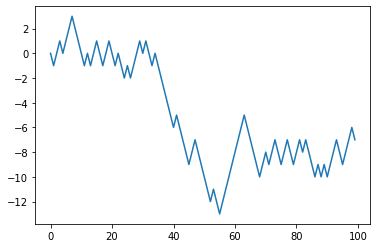

In [172]:
import matplotlib.pyplot as plt
plt.plot(walk[:100])

ランダムウォークで1000歩進んだ状況をPython標準環境で記述すると上のようになり、最初の100歩がどう進んだのかを図で表示してみた  
この結果から、ある時点での到達した位置は、配列に蓄積してきたこれまでの累積和と等しいことがわかる  
したがって、np.randomを用いてこの1000回のコイントスを記述し、それぞれの累積和を求めることができる

In [173]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1) # drawsが0より大きかったら1、それ以外は-1
walk = steps.cumsum() # 要素の累積和を要素ごとに求める

変数walkにはこれまで辿ってきた軌跡がndarrayとして記録されている

In [174]:
walk.min()

-9

In [175]:
walk.max()

60

ndarrayのminとmaxメソッドを使って到達した最大値と最小値を知ることができる

In [176]:
(np.abs(walk) >= 10).argmax()

289

上のようにすることで原点から10の距離まで離れた点に到達するまでにどれくらいかかったかという初到達時間を求めることができる  
np.absで位置の情報を絶対値にし、10より多ければ要素をTrueにしている  
argmaxメソッドは、配列内の最大値のうち一番若いインデックス値を戻す  
真偽値配列の最大値はTrueなので最初にTrueになった要素のインデックス値を返す  
しかし、この方法だとargmaxを呼んだ時点ですべての要素が検査され、要素が多いと負担がかかってしまうため、Trueが出た時点で処理を終了するようにした方がよい

## 4.7.1  多重ランダムウォーク

今回の目的はランダムウォークを5000\*1000回試行し、2次元配列として記録することにする

In [177]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1) # 行ごとに累積和を求める
walks

array([[  1,   0,  -1, ...,  42,  43,  44],
       [  1,   2,   3, ...,  42,  43,  42],
       [ -1,   0,   1, ..., -34, -35, -34],
       ...,
       [ -1,   0,   1, ...,  66,  65,  64],
       [ -1,   0,  -1, ...,  -2,  -1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]], dtype=int32)

1次元のランダムウォークを参考に作ると上のようになる  

In [178]:
walks.max()

122

In [179]:
walks.min()

-132

maxとminを使うことで、5000×1000の要素の中から到達した最大値と最小値を求めることができる

このランダムウォークのデータから、距離が30以上に到達したときの初到達時間を求めるとする  
しかし、すべてのデータが30以上に到達しているわけではないので30以上に到達したことがあるかを調べる必要がある

In [180]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True,  True, ...,  True, False,  True])

In [181]:
hits30.sum()

3338

anyメソッドは、Trueが1個でも含まれているかを調べるメソッドになる  
そして30以上に到達したかどうかを調べた配列にsumメソッドを使い何個のデータが到達したかを調べている

In [182]:
crossing_times = (np.abs(walks[hits30]) >=30).argmax(1)
crossing_times

array([213, 411, 307, ..., 409, 295, 739], dtype=int64)

5000個のデータの中から、30以上に到達したデータのみを指定してargmaxメソッドを使ってインデックス値を得ることで、到達したデータのみを使って求めることができた